-Define appropriate # of clusters per season  
-Save clusters to respective dataframe  
-Plot clusters on map  
-Make boxplots/bargraphs or some other visualization of oceanographic data between clusters

# August

In [1]:
import pandas as pd
df = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/models/Q2A/allseasons.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df[df['sampling_bout']=='Aug_23']
fish_asvs = df.iloc[:, 11:]

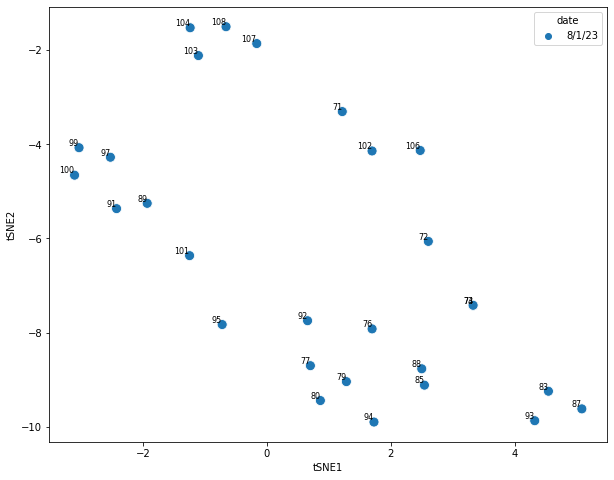

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne = TSNE(n_components=2, random_state=30, perplexity=10, learning_rate=10, n_iter=1000) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=df, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
for i, station in enumerate(df['station']):
    plt.annotate(station, (df['tSNE1'].iloc[i], df['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_

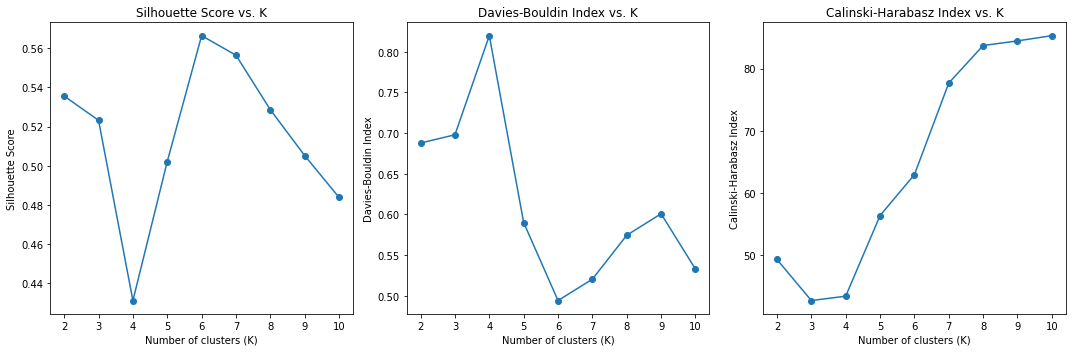

In [3]:
## Determining optimal cluster number
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def compute_clustering_metrics(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df)
    labels = kmeans.labels_
    silhouette = silhouette_score(df, labels)
    davies_bouldin = davies_bouldin_score(df, labels)
    calinski_harabasz = calinski_harabasz_score(df, labels)
    return silhouette, davies_bouldin, calinski_harabasz


tsne_data = df[['tSNE1', 'tSNE2']]

# Define range of K
k_values = range(2, 11)  # Example range from 2 to 10 clusters
silhouette_scores = []
davies_bouldin_indices = []
calinski_harabasz_indices = []

# Compute metrics for each K
for k in k_values:
    silhouette, davies_bouldin, calinski_harabasz = compute_clustering_metrics(tsne_data, k)
    silhouette_scores.append(silhouette)
    davies_bouldin_indices.append(davies_bouldin)
    calinski_harabasz_indices.append(calinski_harabasz)

# Plot the metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_harabasz_indices, marker='o')
plt.title('Calinski-Harabasz Index vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()


Conclusion: 4 clusters in August

# June

In [17]:
temp = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/models/Q2A/allseasons.csv')
temp = temp.drop(['Unnamed: 0'], axis=1)
df1 = temp[temp['sampling_bout']=='Jun_23']
fish_asvs1 = df1.iloc[:, 11:]
# df1

/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_

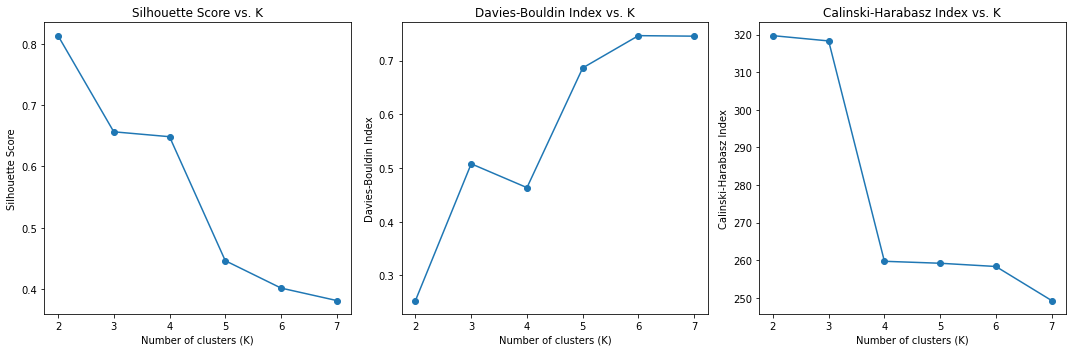

In [21]:
tsne1 = TSNE(n_components=2, random_state=30, perplexity=10, learning_rate=10, n_iter=1000) #test with diff perplexity
tsne_result1 = tsne1.fit_transform(fish_asvs1)

# Add t-SNE results to the dataframe
df1['tSNE1'] = tsne_result1[:, 0]
df1['tSNE2'] = tsne_result1[:, 1]

## Determining optimal cluster number

def compute_clustering_metrics(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df)
    labels = kmeans.labels_
    silhouette = silhouette_score(df, labels)
    davies_bouldin = davies_bouldin_score(df, labels)
    calinski_harabasz = calinski_harabasz_score(df, labels)
    return silhouette, davies_bouldin, calinski_harabasz


tsne_data = df1[['tSNE1', 'tSNE2']]

# Define range of K
k_values = range(2, 8)  # Example range from 2 to 10 clusters
silhouette_scores = []
davies_bouldin_indices = []
calinski_harabasz_indices = []

# Compute metrics for each K
for k in k_values:
    silhouette, davies_bouldin, calinski_harabasz = compute_clustering_metrics(tsne_data, k)
    silhouette_scores.append(silhouette)
    davies_bouldin_indices.append(davies_bouldin)
    calinski_harabasz_indices.append(calinski_harabasz)

# Plot the metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_harabasz_indices, marker='o')
plt.title('Calinski-Harabasz Index vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()

# tsne_data1 = df1[['tSNE1', 'tSNE2']]
# tsne_metrics1 = compute_clustering_metrics(tsne_data1, 2)
# metrics_df1 = pd.DataFrame([tsne_metrics1])


Conclusion: 2 clusters in June

# February


/var/folders/ns/nv0myc8145dctt38_60qt7gm0000gp/T/ipykernel_37956/1010138391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tSNE1'] = tsne_result2[:, 0]
/var/folders/ns/nv0myc8145dctt38_60qt7gm0000gp/T/ipykernel_37956/1010138391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tSNE2'] = tsne_result2[:, 1]
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

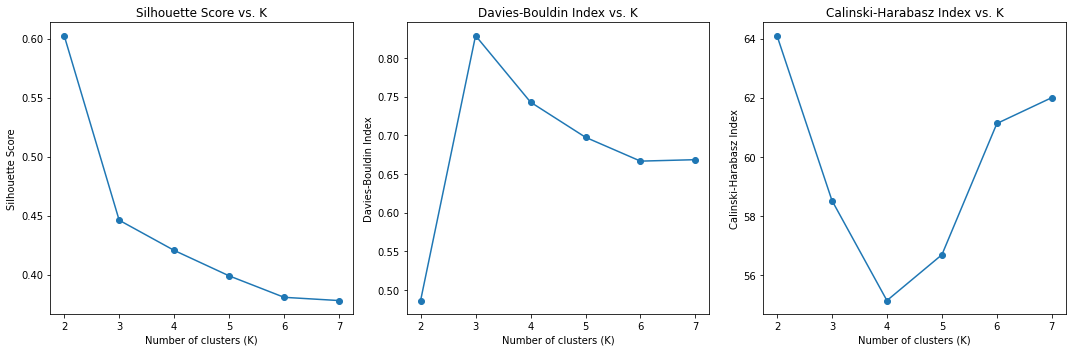

In [18]:
temp = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/models/Q2A/allseasons.csv')
temp = temp.drop(['Unnamed: 0'], axis=1)
data = temp[temp['sampling_bout']=='Feb_24']
data_fish_asvs1 = data.iloc[:, 11:]

tsne2 = TSNE(n_components=2, random_state=30, perplexity=10, learning_rate=10, n_iter=1000) #test with diff perplexity
tsne_result2 = tsne2.fit_transform(data_fish_asvs1)

# Add t-SNE results to the dataframe
data['tSNE1'] = tsne_result2[:, 0]
data['tSNE2'] = tsne_result2[:, 1]

## Determining optimal cluster number

tsne_data2 = data[['tSNE1', 'tSNE2']]

# Define range of K
k_values = range(2, 8)  # Example range from 2 to 10 clusters
silhouette_scores = []
davies_bouldin_indices = []
calinski_harabasz_indices = []

# Compute metrics for each K
for k in k_values:
    silhouette, davies_bouldin, calinski_harabasz = compute_clustering_metrics(tsne_data2, k)
    silhouette_scores.append(silhouette)
    davies_bouldin_indices.append(davies_bouldin)
    calinski_harabasz_indices.append(calinski_harabasz)

# Plot the metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_harabasz_indices, marker='o')
plt.title('Calinski-Harabasz Index vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()

# tsne_data1 = df1[['tSNE1', 'tSNE2']]
# tsne_metrics1 = compute_clustering_metrics(tsne_data1, 2)
# metrics_df1 = pd.DataFrame([tsne_metrics1])

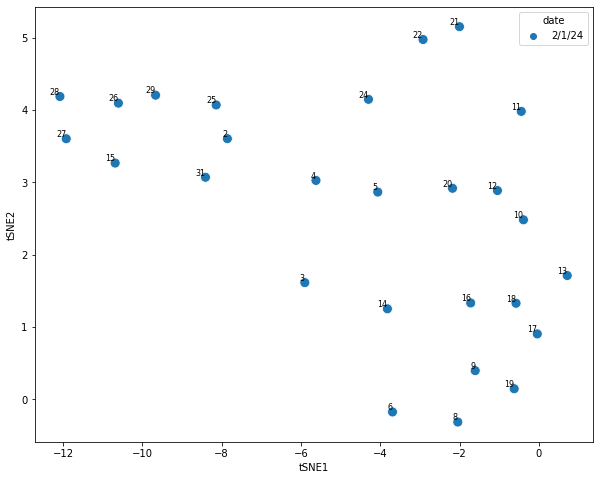

In [7]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=data, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
for i, station in enumerate(data['station']):
    plt.annotate(station, (data['tSNE1'].iloc[i], data['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

2 or 3 clusters in February

## Now plotting clusters and saving to respective dfs
2-4 clusters in February (went with 3, although more likely 2?)
2 clusters in June
6 clusters in August

/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/ns/nv0myc8145dctt38_60qt7gm0000gp/T/ipykernel_37956/2395994944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(data[['tSNE1', 'tSNE2']])


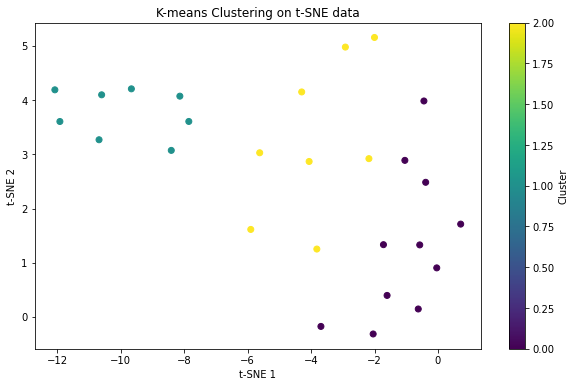

In [26]:
#February
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['tSNE1', 'tSNE2']])
plt.figure(figsize=(10, 6))
plt.scatter(data['tSNE1'], data['tSNE2'], c=data['cluster'], cmap='viridis', marker='o')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('K-means Clustering on t-SNE data')
plt.colorbar(label='Cluster')
plt.show()

/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


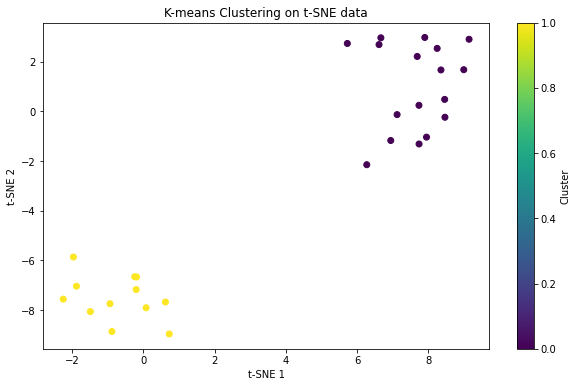

In [22]:
#June
kmeans = KMeans(n_clusters=2, random_state=42)
df1['cluster'] = kmeans.fit_predict(df1[['tSNE1', 'tSNE2']])
plt.figure(figsize=(10, 6))
plt.scatter(df1['tSNE1'], df1['tSNE2'], c=df1['cluster'], cmap='viridis', marker='o')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('K-means Clustering on t-SNE data')
plt.colorbar(label='Cluster')
plt.show()

/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


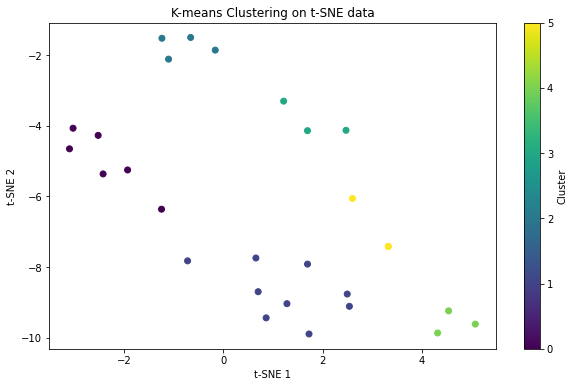

In [15]:
# August
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['tSNE1', 'tSNE2']])
plt.figure(figsize=(10, 6))
plt.scatter(df['tSNE1'], df['tSNE2'], c=df['cluster'], cmap='viridis', marker='o')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('K-means Clustering on t-SNE data')
plt.colorbar(label='Cluster')
plt.show()


In [29]:
for_plot = pd.concat([df, df1, data])
for_plot
for_plot.to_excel('googlemap.xlsx')